RIDGE & LASSO REGRESSION

In [14]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as m


In [2]:
df= pd.read_csv('./spotifyTracksDataset.csv', index_col=0)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [4]:
#track_id and track_name have no significance on the prediction of the popularity so we drop it
df=df.drop('track_id', axis=1)
df=df.drop('track_name', axis=1)
df.head()

,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
#make boolean field into an integer field with 0, 1 vals
df['explicit']=df['explicit'].astype(int)


In [6]:
df['track_genre'].nunique()
df= pd.get_dummies(df, columns=['track_genre'])
df.head()

,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,Gen Hoshino,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,...,False,False,False,False,False,False,False,False,False,False
1,Ben Woodward,Ghost (Acoustic),55,149610,0,0.420,0.1660,1,-17.235,1,...,False,False,False,False,False,False,False,False,False,False
2,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,...,False,False,False,False,False,False,False,False,False,False
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,71,201933,0,0.266,0.0596,0,-18.515,1,...,False,False,False,False,False,False,False,False,False,False
4,Chord Overstreet,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,...,False,False,False,False,False,False,False,False,False,False


In [7]:
Y=df['popularity']
X=df.drop('popularity', axis=1)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
#target encoding to avoid tooooo many columns which will come up if we do one hot encoding with the artists and album_name columns
train_df = X_train.copy()
train_df['popularity'] = Y_train

# 3. Target encoding for 'album_name'
album_means = train_df.groupby('album_name')['popularity'].mean().to_dict()
X_train['album_encoded'] = X_train['album_name'].map(album_means)
X_test['album_encoded'] = X_test['album_name'].map(album_means)

# 4. Same for 'artists'
artist_means = train_df.groupby('artists')['popularity'].mean().to_dict()
X_train['artist_encoded'] = X_train['artists'].map(artist_means)
X_test['artist_encoded'] = X_test['artists'].map(artist_means)

# 5. Drop the original text columns
X_train.drop(columns=['album_name', 'artists'], inplace=True)
X_test.drop(columns=['album_name', 'artists'], inplace=True)

# Fill NaNs in test set after target encoding
X_test.fillna(Y_train.mean(), inplace=True)


In [19]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [20]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, Y_train)
ridge_preds = ridge.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, Y_train)
lasso_preds = lasso.predict(X_test_scaled)


In [23]:
from sklearn.metrics import mean_squared_error, r2_score
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Regression Results:")
    print("R² Score:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

evaluate_model("Ridge", Y_test, ridge_preds)
evaluate_model("Lasso", Y_test, lasso_preds)



Ridge Regression Results:
R² Score: 0.7640708090541372
MSE: 116.42654600910964
RMSE: 10.790113345517259

Lasso Regression Results:
R² Score: 0.7612516800513209
MSE: 117.81773228511103
RMSE: 10.854387697383535



Top Features Selected by Lasso:
track_genre_turkish        20.106189
track_genre_world-music     1.896374
track_genre_party           0.062093
speechiness                -0.045568
track_genre_comedy          0.026392
track_genre_dub             0.012824
track_genre_malay           0.002146
dtype: float64


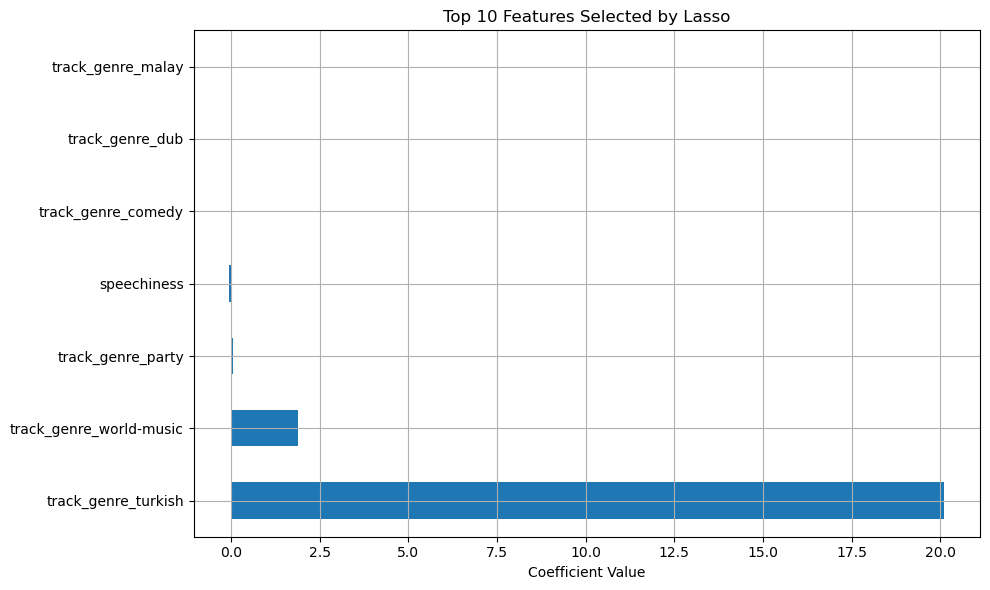

In [25]:
lasso_coefs = pd.Series(lasso.coef_, index=X.columns)
non_zero_coefs = lasso_coefs[lasso_coefs != 0].sort_values(key=abs, ascending=False)

print("\nTop Features Selected by Lasso:")
print(non_zero_coefs.head(10))

# Optional plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
non_zero_coefs.head(10).plot(kind='barh')
plt.title("Top 10 Features Selected by Lasso")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, Y_train)
ridge_preds = ridge.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, Y_train)
lasso_preds = lasso.predict(X_test_scaled)
